In [3]:
import warnings
warnings.filterwarnings("ignore")
import shutil
import os
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pickle
from sklearn.manifold import TSNE
from sklearn import preprocessing
import pandas as pd
from multiprocessing import Process# this is used for multithreading
import multiprocessing 
import random as r
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import log_loss
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import MiniBatchKMeans

In [4]:
features = ['duration','protocol_type','service','flag','src_bytes','dst_bytes','land','wrong_fragment','urgent','hot','num_failed_logins','logged_in','num_compromised','root_shell','su_attempted',
'num_root','num_file_creations','num_shells','num_access_files','num_outbound_cmds',
'is_host_login',
'is_guest_login',
'count',
'srv_count',
'serror_rate',
'srv_serror_rate',
'rerror_rate',
'srv_rerror_rate',
'same_srv_rate',
'diff_srv_rate',
'srv_diff_host_rate',
'dst_host_count',
'dst_host_srv_count',
'dst_host_same_srv_rate',
'dst_host_diff_srv_rate',
'dst_host_same_src_port_rate',
'dst_host_srv_diff_host_rate',
'dst_host_serror_rate',
'dst_host_srv_serror_rate',
'dst_host_rerror_rate',
'dst_host_srv_rerror_rate',
'intrusion_type']

In [5]:
data = pd.read_csv('kddcup.data_10_percent', names=features, header=None)
data.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,intrusion_type
0,0,tcp,http,SF,181,5450,0,0,0,0,...,9,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0,normal.
1,0,tcp,http,SF,239,486,0,0,0,0,...,19,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,normal.
2,0,tcp,http,SF,235,1337,0,0,0,0,...,29,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.
3,0,tcp,http,SF,219,1337,0,0,0,0,...,39,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.
4,0,tcp,http,SF,217,2032,0,0,0,0,...,49,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal.


<h2> Train Test Split:- </h2>

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(data.drop('intrusion_type', axis=1), data['intrusion_type'], stratify=data['intrusion_type'], test_size=0.25)

<h3> Merging categorical and continuous features:- </h3>

In [6]:
from scipy.sparse import hstack

In [7]:
X_train_1 = hstack((duration1, train_protocol, train_service, train_flag, src_bytes1,
       dst_bytes1, land1.T, wrong_fragment1, urgent1, hot1,
       num_failed_logins1, logged_in1.T, num_compromised1, root_shell1,
       su_attempted1, num_root1, num_file_creations1, num_shells1,
       num_access_files1, is_host_login1.T,
       is_guest_login1.T, count1, srv_count1, serror_rate1,
       srv_serror_rate1, rerror_rate1, srv_rerror_rate1, same_srv_rate1,
       diff_srv_rate1, srv_diff_host_rate1, dst_host_count1,
       dst_host_srv_count1, dst_host_same_srv_rate1,
       dst_host_diff_srv_rate1, dst_host_same_src_port_rate1,
       dst_host_srv_diff_host_rate1, dst_host_serror_rate1,
       dst_host_srv_serror_rate1, dst_host_rerror_rate1,
       dst_host_srv_rerror_rate1))

NameError: name 'duration1' is not defined

In [110]:
X_train_1.shape

(109189, 115)

In [111]:
X_test_1 = hstack((duration2, test_protocol, test_service, test_flag, src_bytes2,
       dst_bytes2, land2.T, wrong_fragment2, urgent2, hot2,
       num_failed_logins2, logged_in2.T, num_compromised2, root_shell2,
       su_attempted2, num_root2, num_file_creations2, num_shells2,
       num_access_files2, is_host_login2.T,
       is_guest_login2.T, count2, srv_count2, serror_rate2,
       srv_serror_rate2, rerror_rate2, srv_rerror_rate2, same_srv_rate2,
       diff_srv_rate2, srv_diff_host_rate2, dst_host_count2,
       dst_host_srv_count2, dst_host_same_srv_rate2,
       dst_host_diff_srv_rate2, dst_host_same_src_port_rate2,
       dst_host_srv_diff_host_rate2, dst_host_serror_rate2,
       dst_host_srv_serror_rate2, dst_host_rerror_rate2,
       dst_host_srv_rerror_rate2))

In [112]:
X_test_1.shape

(36397, 115)

In [113]:
import joblib
joblib.dump(X_train_1,'X_train_1.pkl')
joblib.dump(X_test_1,'X_test_1.pkl')
X_train_1 = joblib.load('X_train_1.pkl')
X_test_1 = joblib.load('X_test_1.pkl')

In [114]:
joblib.dump(Y_train,'Y_train.pkl')
joblib.dump(Y_test,'Y_test.pkl')
Y_train = joblib.load('Y_train.pkl')
Y_test = joblib.load('Y_test.pkl')

<h3> Further Approach to our problem </h3>

- <h6> We will first apply below classifiers on our dataset and evaluate their performance: </h6>
    
    
    1. Naive Bayes
    2. Logistic Regression
    3. SVM 
    4. Decision Tree
    5. Random Forest
    6. GBDT / XGBoost
    
    
- <h6> Based on the performance metric scores we obtain from the above classifiers, we will apply below feature engineering techniques on our dataset to get additional features: </h6>
    
    
    1. Clustering features:- We will apply clustering on our dataset and add the clustering values as an additional feature to our dataset.
    
    2. PCA transformed features:- We will apply PCA/TSNE/SVD on the dataset and will use the top 5 PCA features as additional features on our dataset.  
    
    3. Feature engineering using existing features:- We will apply feature engineering techniques like 
        (i) Adding 2 existing features, (e.g. new_feature_1 = src_bytes + dst_bytes) 
        (ii)Subtracting 2 existing features, (e.g. new_feature_2 = abs(src_bytes - dst_bytes).
        
        
        
- <h6> We will then apply the best performing classifiers from dataset 1 on dataset 2 and evaluate their performance. </h6>

<h2> Applying Machine Algorithms:- </h2>

<h5> Utility Functions:- </h5>

In [115]:
import datetime as dt
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
import joblib

In [116]:
def confusion_matrix_func(Y_test, y_test_pred):
    '''
    This function plots the confusion matrix heatmap using the actual and predicted values.
    '''
    C = confusion_matrix(Y_test, y_test_pred)
    cm_df = pd.DataFrame(C)
    labels = ['back', 'butter_overflow', 'loadmodule', 'guess_passwd', 'imap', 'ipsweep', 'warezmaster', 'rootkit', 
              'multihop', 'neptune', 'nmap', 'normal', 'phf', 'perl', 'pod', 'portsweep', 'ftp_write', 'satan', 'smurf',
              'teardrop', 'warezclient', 'land']
    plt.figure(figsize=(20,15))
    sns.set(font_scale=1.4)
    sns.heatmap(cm_df, annot=True, annot_kws={"size":12}, fmt='g', xticklabels=labels, yticklabels=labels)
    plt.ylabel('Actual Class')
    plt.xlabel('Predicted Class')
    
    plt.show()

In [117]:
def model(model_name, X_train, Y_train, X_test, Y_test):
    
    '''
    This function computes the performance scores on the train and test data.
    '''
    
    print('Fitting the model and prediction on train data:')
    start = dt.datetime.now()
    model_name.fit(X_train, Y_train)
    y_tr_pred = model_name.predict(X_train)
    print('Completed')
    print('Time taken:',dt.datetime.now()-start)
    print('='*50)
    
    results_tr = dict()
    y_tr_pred = model_name.predict(X_train)    
    results_tr['precision'] = precision_score(Y_train, y_tr_pred, average='weighted')
    results_tr['recall'] = recall_score(Y_train, y_tr_pred, average='weighted')
    results_tr['f1_score'] = f1_score(Y_train, y_tr_pred, average='weighted')
    
    results_test = dict()
    print('Prediction on test data:')
    start = dt.datetime.now()
    y_test_pred = model_name.predict(X_test)
    print('Completed')
    print('Time taken:',dt.datetime.now()-start)
    print('='*50)
    
    print('Performance metrics:')
    print('='*50)
    print('Confusion Matrix is:')
    confusion_matrix_func(Y_test, y_test_pred)
    print('='*50)
    results_test['precision'] = precision_score(Y_test, y_test_pred, average='weighted')
    print('Precision score is:')
    print(precision_score(Y_test, y_test_pred, average='weighted'))
    print('='*50)
    results_test['recall'] = recall_score(Y_test, y_test_pred, average='weighted')
    print('Recall score is:')
    print(recall_score(Y_test, y_test_pred, average='weighted'))
    print('='*50)
    results_test['f1_score'] = f1_score(Y_test, y_test_pred, average='weighted')
    print('F1-score is:')
    print(f1_score(Y_test, y_test_pred, average='weighted'))
    # add the trained  model to the results
    results_test['model'] = model
    
    return results_tr, results_test

In [118]:
def print_grid_search_attributes(model):
    
    '''
    This function prints all the grid search attributes
    '''
    
    print('---------------------------')
    print('|      Best Estimator     |')
    print('---------------------------')
    print('\n\t{}\n'.format(model.best_estimator_))


    # parameters that gave best results while performing grid search
    print('---------------------------')
    print('|     Best parameters     |')
    print('---------------------------')
    print('\tParameters of best estimator : \n\n\t{}\n'.format(model.best_params_))


    #  number of cross validation splits
    print('----------------------------------')
    print('|   No of CrossValidation sets   |')
    print('----------------------------------')
    print('\n\tTotal numbre of cross validation sets: {}\n'.format(model.n_splits_))


    # Average cross validated score of the best estimator, from the Grid Search 
    print('---------------------------')
    print('|        Best Score       |')
    print('---------------------------')
    print('\n\tAverage Cross Validate scores of best estimator : \n\n\t{}\n'.format(model.best_score_))

In [119]:
def tpr_fpr_func(Y_tr, Y_pred):
    '''
    This function computes the TPR and FPR scores using the actual and predicetd values
    '''
    results = dict()
    Y_tr = Y_tr.to_list()
    tp = 0; fp = 0; positives = 0; negatives = 0; length = len(Y_tr)
    for i in range(len(Y_tr)):
        if Y_tr[i]=='normal.':
            positives += 1
        else:
            negatives += 1
            
    for i in range(len(Y_pred)):
        if Y_tr[i]=='normal.' and Y_pred[i]=='normal.':
            tp += 1
        elif Y_tr[i]!='normal.' and Y_pred[i]=='normal.':
            fp += 1
            
    tpr = tp/positives
    fpr = fp/negatives
    
    results['tp'] = tp; results['tpr'] = tpr; results['fp'] = fp; results['fpr'] = fpr
    
    return results
    

<h3> Model_1 :- Gaussian Naive Bayes </h3>

In [120]:
hyperparameter = {'var_smoothing':[10**x for x in range(-9,3)]}

from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb_grid = GridSearchCV(nb, param_grid=hyperparameter, cv=5, verbose=1, n_jobs=-1)

Fitting the model and prediction on train data:
Fitting 5 folds for each of 12 candidates, totalling 60 fits
Completed
Time taken: 0:00:19.535634
Prediction on test data:
Completed
Time taken: 0:00:00.485023
Performance metrics:
Confusion Matrix is:


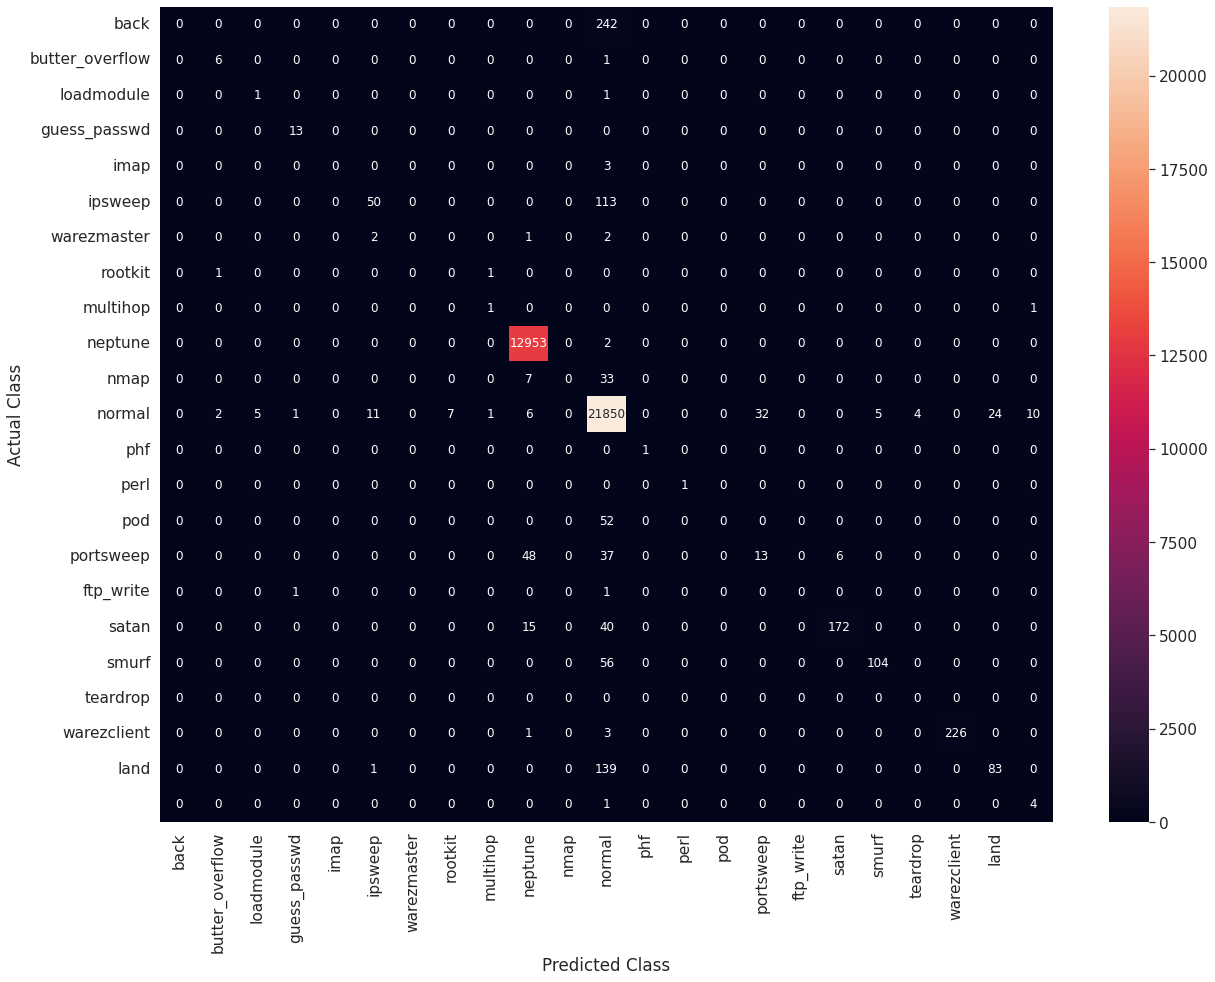

Precision score is:
0.9638699239207957
Recall score is:
0.9747506662637031
F1-score is:
0.9679689128273304


In [121]:
nb_grid_results_tr, nb_grid_results_test = model(nb_grid, X_train_1.toarray(), Y_train, X_test_1.toarray(), Y_test)

In [122]:
print_grid_search_attributes(nb_grid)

---------------------------
|      Best Estimator     |
---------------------------

	GaussianNB(var_smoothing=10)

---------------------------
|     Best parameters     |
---------------------------
	Parameters of best estimator : 

	{'var_smoothing': 10}

----------------------------------
|   No of CrossValidation sets   |
----------------------------------

	Total numbre of cross validation sets: 5

---------------------------
|        Best Score       |
---------------------------

	Average Cross Validate scores of best estimator : 

	0.9726804097747708



In [123]:
joblib.dump(nb_grid.best_estimator_, 'nb_gs.pkl')

['nb_gs.pkl']

In [124]:
nb_gs = nb_grid.best_estimator_
y_tr_pred = nb_gs.predict(X_train_1.toarray())
y_test_pred = nb_gs.predict(X_test_1.toarray())
tpr_fpr_train = tpr_fpr_func(Y_train, y_tr_pred)
tpr_fpr_test = tpr_fpr_func(Y_test, y_test_pred)

In [125]:
tpr_fpr_train

{'tp': 65529,
 'tpr': 0.9947627288459787,
 'fp': 2258,
 'fpr': 0.05212974720073878}

In [126]:
nb_grid_results_tr

{'precision': 0.9630576928376071,
 'recall': 0.9739351033529019,
 'f1_score': 0.9668687892566603}

In [127]:
tpr_fpr_test

{'tp': 21850, 'tpr': 0.9950815192640495, 'fp': 726, 'fpr': 0.05028049033866611}

In [128]:
nb_grid_results_test

{'precision': 0.9638699239207957,
 'recall': 0.9747506662637031,
 'f1_score': 0.9679689128273304,
 'model': <function __main__.model(model_name, X_train, Y_train, X_test, Y_test)>}

<h6> Observations from applying Naive Bayes Classifier:- </h6>



    
- The test data has 36397 total no. of points. Out of these, 21958 are points belonging to Normal connections and remaining 14439 points belong to Bad connections.
    

- Out of the 21958 Normal connection points, 21814 (99.34%) were classified correctly by the Naive Bayes Classifier.
  
  
- Out of the 14439 points belonging to Bad connections, class Neptune has the highest no. of data points 12955, out of which 12954(99.99%) are classified correctly.
    
    
- Out of the classes having very less no. of data points, class guess_passwd was classified with (12/13) 92.30% accuracy, class butter_overflow with (6/7) 85.71% accuracy,class warezmaster with(4/5) 80% accuracy, class land with(4/5) 80% accuracy, class imap with(0/3) 0% accuracy, class loadmodule with (1/2) 50% accuracy, class rootkit with(0/2) 0% accuracy, class multihop with (0/2) 0% accuracy, class ftp_write with(0/2) 0% accuracy, and classes phf and perl with both (1/1) 100% accuracy.
    
    
- Although the Naive bayes Classifier was able to classify points with a high f1 score of 0.9670, we can use more advanced Non-linear and linear classifiers ahead and we will try to classify the Normal and bad connections with a higher f1-score.


- false positives : 710


- false positive rate : 0.049


- true positive : 21814


- true positive rate : 0.9934


- As the train and test scores are almost similar and high, we can say that the model is "NEITHER OVERFITTING NOR UNDERFITTING".

<h3> Model_2:- Logistic Regression </h3>

In [129]:
hyperparameter = {'alpha':[0.001, 0.01, 0.1, 1, 10, 20, 30], 'penalty':['l1', 'l2']}
from sklearn.linear_model import SGDClassifier
lr = SGDClassifier(loss='log')
lr_grid = GridSearchCV(lr, param_grid=hyperparameter, cv=5, verbose=1, n_jobs=-1)

In [130]:
lr_grid_results_tr, lr_grid_results_test = model(lr_grid, X_train_1.toarray(), Y_train, X_test_1.toarray(), Y_test)

Fitting the model and prediction on train data:
Fitting 5 folds for each of 14 candidates, totalling 70 fits


KeyboardInterrupt: 

In [ ]:
print_grid_search_attributes(lr_grid)

In [ ]:
joblib.dump(lr_grid.best_estimator_, 'lr_gs.pkl')

In [ ]:
lr_gs = lr_grid.best_estimator_
y_tr_pred = lr_gs.predict(X_train_1.toarray())
y_test_pred = lr_gs.predict(X_test_1.toarray())
tpr_fpr_train = tpr_fpr_func(Y_train, y_tr_pred)
tpr_fpr_test = tpr_fpr_func(Y_test, y_test_pred)

In [ ]:
lr_grid_results_tr

In [ ]:
tpr_fpr_train

In [ ]:
lr_grid_results_test

In [ ]:
tpr_fpr_test

<h6> Observations from applying Logistic Regression Classifier:- </h6>


- Out of the 21958 Normal connection points, 21918 (99.81%) were correctly classified by the LR Classifier.
    

- Out of the 14439 points belonging to Bad connections, class Neptune has the highest no. of data points 12955, out of which 12950(99.96%) were classified correctly.
    

- Out of the classes having very less no. of data points, class guess_passwd was classified with (13/13) 100% accuracy, class butter_overflow with (2/7) 28.15% accuracy, class warezmaster with(0/5) 0% accuracy, class land with(4/5) 80% accuracy, class imap with(0/3) 0% accuracy, class loadmodule with (0/2) 0% accuracy, class rootkit with(0/2) 0% accuracy, class multihop with (0/2) 0% accuracy, class ftp_write with(0/2) 0% accuracy, and class phf with (0/1)
0% accuracy and class perl with (0/1) 0% accuracy.
        

- Classes with very low no. of data points like loadmodule, multihop, ftp_write, phf were not classified correctly by this classifier.
    

- The Logistic Regression Classifier was able to classify points with a high f1 score of 0.9819 compared to the Naive Bayes Classifier. 
        

- From the good performance of the Logistic Regression model, we can conclude that the data has some linearity in the higher dimensional space which was not visible in the lower dimensional 2D pair plots and Tsne transformed 2D space.


- True Postives = 21918


- TPR = 0.9981


- False Positives = 399


- FPR = 0.0276


- LR model has a lower FPR and higher TPR than the NB Classifier.


- As the train and test scores are almost similar and high, we can say that the LR model is "NEITHER OVERFITTING NOR UNDERFITTING".

<h3> Model_3 :- SVM (SGD_Classifier with loss='hinge') </h3>

In [ ]:
hyperparameter = {'alpha':[10**x for x in range(-8,3)], 'penalty':['l1', 'l2']}

from sklearn.linear_model import SGDClassifier
svm = SGDClassifier(loss='hinge')
svm_grid = GridSearchCV(svm, param_grid=hyperparameter, cv=5, verbose=1, n_jobs=-1)

In [ ]:
svm_grid_results_tr, svm_grid_results_test = model(svm_grid, X_train_1.toarray(), Y_train, X_test_1.toarray(), Y_test)

In [ ]:
print_grid_search_attributes(svm_grid)

In [ ]:
joblib.dump(svm_grid.best_estimator_, 'svm_gs.pkl')

In [ ]:
svm_gs = svm_grid.best_estimator_
y_tr_pred = svm_gs.predict(X_train_1.toarray())
y_test_pred = svm_gs.predict(X_test_1.toarray())
svm_tpr_fpr_train = tpr_fpr_func(Y_train, y_tr_pred)
svm_tpr_fpr_test = tpr_fpr_func(Y_test, y_test_pred)

In [ ]:
svm_grid_results_tr

In [ ]:
svm_tpr_fpr_train

In [ ]:
svm_grid_results_test

In [ ]:
svm_tpr_fpr_test

<h6> Observations from applying SVM Classifier (SGD Classifier + "hinge" loss):- </h6>


    
    
- Out of the 21958 Normal connection points, 21931 (99.85%) were correctly classified by the SVM Classifier.
    

- Out of the 17409 points belonging to Bad connections, class Neptune has the highest no. of data points 12955, out of which 12954(99.99%) were classified correctly.
    

- Out of the classes having very less no. of data points, class guess_passwd was classified with (13/13) 100.0% accuracy, class buffer_overflow with (1/7) 14.71% accuracy,class warezmaster with(3/5) 60% accuracy, class land with(4/5) 80% accuracy, class imap with(3/3) 100% accuracy, class loadmodule with (0/2) 0% accuracy, class rootkit with(0/2) 0% accuracy, class multihop with (0/2) 0% accuracy, class ftp_write with(0/2) 0% accuracy, and class phf with (1/1)100% accuracy and class perl with (0/1) 0% accuracy.
 
 
- The SVM Classifier was able to classify points with a high f1 score of 0.9966 compared to Naive Bayes and LR Classifiers. 
        


- True Postives = 21931


- TPR = 0.9985


- False Positives = 63


- FPR = 0.0043


- The SVM Classifier has the lowest FPR and highest FPR than the NB and LR models.


- As the train and test scores are almost similar and high, we can say that the LR model is "NEITHER OVERFITTING NOR UNDERFITTING"

<h3> Model_4 :- Decision Tree </h3>

In [ ]:
hyperparameter = {'max_depth':[5, 10, 20, 50, 100, 500], 'min_samples_split':[5, 10, 100, 500]}

from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier(criterion='gini', splitter='best',class_weight='balanced')
decision_tree_grid = GridSearchCV(decision_tree, param_grid=hyperparameter, cv=3, verbose=1, n_jobs=-1)

In [ ]:
decision_tree_grid_results_tr, decision_tree_grid_results_test = model(decision_tree_grid, X_train_1.toarray(), Y_train, X_test_1.toarray(), Y_test)

In [ ]:
print_grid_search_attributes(decision_tree_grid)

In [ ]:
joblib.dump(decision_tree_grid.best_estimator_, 'decision_tree_gs.pkl')

In [ ]:
dt_gs = decision_tree_grid.best_estimator_
y_tr_pred = dt_gs.predict(X_train_1.toarray())
y_test_pred = dt_gs.predict(X_test_1.toarray())
dt_tpr_fpr_train = tpr_fpr_func(Y_train, y_tr_pred)
dt_tpr_fpr_test = tpr_fpr_func(Y_test, y_test_pred)

In [ ]:
decision_tree_grid_results_tr

In [ ]:
dt_tpr_fpr_train

In [ ]:
decision_tree_grid_results_test

In [ ]:
dt_tpr_fpr_test

<h6> Observations from applying Decision Tree Classifier:- </h6>


    
    
- Out of the 21958 Normal connection points, 21934 (99.89%) were correctly classified by the Decision Tree Classifier.
    

- Out of the 14439 points belonging to Bad connections, class Neptune has the highest no. of data points 12955, out of which 12953(99.98%) were classified correctly.
 
 
- Out of the classes having very less no. of data points, class guess_passwd was classified with (13/13) 100% accuracy, class butter_overflow with (6/7) 85.71% accuracy, class warezmaster with(5/5) 100% accuracy, class land with(4/5) 80% accuracy, class imap with(3/3) 100% accuracy, class loadmodule with (0/2) 0% accuracy, class rootkit with(1/2) 50% accuracy, class multihop with (1/2) 50% accuracy, class ftp_write with(0/2) 0% accuracy, class phf with (1/1) 100% accuracy and class perl with (1/1) 100% accuracy.
    
    
- The Decision Tree Classifier was able to classify points with a higher f1 score of 0.9986 compared to all the previous Classifiers. 


- True Postives = 21937


- TPR = 0.9990


- False Positives = 19


- FPR = 0.0013


- The DT Classifier has the lowest FPR and highest TPR compared to all of the above models.


- Thus, we can say that a non linear ML model like DT is able to learn the pattern from the data better compared to the linear classifiers.
        

<h3> Model_5 :- Random Forest </h3>

In [ ]:
hyperparameter = {'max_depth':[5, 10, 100, 500, 1000], 'n_estimators': [5, 10, 50, 100, 500],
                  'min_samples_split':[5, 10, 100, 500]}

from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(criterion='gini',class_weight='balanced')
rf_grid = GridSearchCV(rf, param_grid=hyperparameter, cv=3, verbose=1, n_jobs=-1)

In [ ]:
rf_grid_results_tr, rf_grid_results_test = model(rf_grid, X_train_1.toarray(), Y_train, X_test_1.toarray(), Y_test)

In [ ]:
print_grid_search_attributes(rf_grid)

In [ ]:
rf_gs = rf_grid.best_estimator_
y_tr_pred = rf_gs.predict(X_train_1.toarray())
y_test_pred = rf_gs.predict(X_test_1.toarray())
rf_tpr_fpr_train = tpr_fpr_func(Y_train, y_tr_pred)
rf_tpr_fpr_test = tpr_fpr_func(Y_test, y_test_pred)

In [ ]:
rf_grid_results_tr

In [ ]:
rf_tpr_fpr_train

In [ ]:
rf_grid_results_test

In [ ]:
rf_tpr_fpr_test

In [ ]:
joblib.dump(rf_grid.best_estimator_, 'rf_gs.pkl')

<h6> Observations from applying Random Forest Classifier:- </h6>


    
    
- Out of the 21958 Normal connection points, 21954 (99.98%) were correctly classified by the RF Classifier.
    

- Out of the 17409 points belonging to Bad connections, class Neptune has the highest no. of data points 12955, out of which 12954(99.99%) were classified correctly.
    

- Out of the classes having very less no. of data points, class guess_passwd was classified with (13/13) 100% accuracy, class butter_overflow with (6/7) 85.71% accuracy, class warezmaster with(5/5) 100% accuracy, class land with(4/5) 80% accuracy, class imap with(2/3) 66.67% accuracy, class loadmodule with (1/2) 50% accuracy, class rootkit with(0/2) 0% accuracy, class multihop with (1/2) 50% accuracy, class ftp_write with(0/2) 0% accuracy, class phf with (1/1) 100% accuracy and class perl with (1/1) 100% accuracy.
    

- The RF Classifier was able to classify the Normal connection points with the highest f1_score compared to all of the above classifiers. 
        

- But this classifier was still unable to correctly classify bad connection classes like loadmodule, rootkit and ftp_write.


- True Postives = 21954


- TPR = 0.9998


- False Positives = 19


- FPR = 0.0013


- The RF Classifier has a lower FPR compared to the DT model.


- As the train and test metrics like f1-score, tpr and fpr are almost similar, the model is NOT OVERFITTING.

        

<h3> Model_6 :- XGBoost </h3>

In [ ]:
hyperparameter = {'max_depth':[2, 3, 5, 7, 10], 'n_estimators': [10, 50, 100, 200, 500]}

from xgboost import XGBClassifier
xgb = XGBClassifier(objective='multi:softprob')
xgb_grid = RandomizedSearchCV(xgb, param_distributions=hyperparameter, cv=3, verbose=1, n_jobs=-1)

In [ ]:
xgb_best = xgb_grid.best_estimator_

In [ ]:
xgb_grid_results_tr, xgb_grid_results_test = model(xgb_best, X_train_1.toarray(), Y_train, X_test_1.toarray(), Y_test)

In [ ]:
print_grid_search_attributes(xgb_grid)

In [ ]:
xgb_gs = xgb_grid.best_estimator_
y_tr_pred = xgb_gs.predict(X_train_1.toarray())
y_test_pred = xgb_gs.predict(X_test_1.toarray())
xgb_tpr_fpr_train = tpr_fpr_func(Y_train, y_tr_pred)
xgb_tpr_fpr_test = tpr_fpr_func(Y_test, y_test_pred)

In [ ]:
xgb_grid_results_tr

In [ ]:
xgb_tpr_fpr_train

In [ ]:
xgb_grid_results_test

In [ ]:
xgb_tpr_fpr_test

In [ ]:
joblib.dump(xgb_grid.best_estimator_, 'xgb_gs.pkl')

<h6> Observations from applying XG Boost Classifier:- </h6>


    
    
- Out of the 21958 Normal connection points, 21955 (99.98%) were correctly classified by the XGB Classifier.


- Out of the 17409 points belonging to Bad connections, class Neptune has the highest no. of data points 12955, out of which 12955(100.0%) were classified correctly.


- Out of the classes having very less no. of data points, class guess_passwd was classified with (12/13) 92.30% accuracy, class butter_overflow with (7/7) 100.0% accuracy, class warezmaster with(4/5) 80% accuracy, class land with(5/5) 100% accuracy, class imap with(3/3) 100% accuracy, class loadmodule with (0/2) 0% accuracy, class rootkit with(0/2) 0% accuracy, class multihop with (0/2) 0% accuracy, class ftp_write with(1/2) 50% accuracy, class phf with (1/1) 100% accuracy and class perl with (1/1) 100% accuracy.

    
- The XGB Classifier was able to classify different classes with the highest f1-score(0.9994) comapred to all of the above models.


- True Postives = 21955


- TPR = 0.9998


- False Positives = 12


- FPR = 0.00083


- The XGB Classifier has the highest TPR and lowest FPR compared to all of the previous models.


- As the train and test metrics like f1-score, tpr and fpr are almost similar, the model is NOT OVERFITTING.



<h2> Observation from ALL of the above classifiers:- </h2>

- If we consider NORMAL connection points as 1 class and points belonging to all the other 22 BAD connection classes as the 2nd class, then XGB Classifier is the best classifier as it has a TPR and FPR of 0.9998 and 0.0011.


- Although XGB classifier had a better f1_score than the RF classifier, if we go into details of the confusion matrix scores, we can observe that both classifiers have performed similarly on the different categories of attacks on our  dataset.


- The RF Classifier has TPR and FPR of 0.9998 and 0.0013.
    

- The overall time taken for training + evaluation was less for the RF and DT classifiers compared to the XGB classifier.


<h6> As the train and test metrics like f1-score, tpr and fpr have almost similar scores for train and test dataseta, the models are NOT OVERFITTING. </h6>
    

- A common pattern shown by all of the classifiers is that classes rootkit, ftp_write and loadmodule were misclassified as class Normal by most of the classifiers.
        

- We will add more features in our dataset and try to improve the classifier performance.
    

- As DT, RF & XGB had the best performance, we will use these 3 classifiers ahead on the existing + feature engineered data.

<h2> Adding new features:- </h2>

<h3> 1. Clustering features (using MiniBatchKmeans):- </h3>

https://scikit-learn.org/stable/modules/generated/sklearn.cluster.MiniBatchKMeans.html

<h6> KMeans with n=23 (for Multiclass Classification):- </h6>

In [ ]:
data = pd.read_pickle('data.pkl')
print('Shape of our dataset', data.shape)

In [ ]:
from sklearn.cluster import MiniBatchKMeans
import numpy as np

In [ ]:
kmeans_1 = MiniBatchKMeans(n_clusters=23, random_state=0, batch_size=128, max_iter=1000) #Multiclass classification
kmeans_1.fit(X_train_1)

In [ ]:
train_cluster_1 = kmeans_1.predict(X_train_1)
test_cluster_1 = kmeans_1.predict(X_test_1)

In [ ]:
print('Length of train cluster is:',len(train_cluster_1))
train_cluster_1

In [ ]:
print('Length of test cluster is',len(test_cluster_1))
test_cluster_1

In [ ]:
train_cluster_1 = np.array([train_cluster_1])
train_cluster_1.shape

In [ ]:
test_cluster_1 = np.array([test_cluster_1])
test_cluster_1.shape

<h6> KMeans with n=2 (for solving Binary Classification problem to improve TPR and reduce FPR):- </h6>

In [ ]:
kmeans_2 = MiniBatchKMeans(n_clusters=2, random_state=0, batch_size=128, max_iter=1000) #Binary Classification
kmeans_2.fit(X_train_1)

In [ ]:
train_cluster_2 = kmeans_2.predict(X_train_1)
test_cluster_2 = kmeans_2.predict(X_test_1)

In [ ]:
print('Length of train cluster is:',len(train_cluster_2))
train_cluster_2

In [ ]:
print('Length of test cluster is',len(test_cluster_2))
test_cluster_2

In [ ]:
train_cluster_2 = np.array([train_cluster_2])
train_cluster_2.shape

In [ ]:
test_cluster_2 = np.array([test_cluster_2])
test_cluster_2.shape

<h3> 2. PCA features :- </h3>

https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html

- We will add top 5 PCA features to our dataset. (We can add more or less and test if they improve the performance)

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca = PCA(n_components=5)
pca.fit(X_train_1.toarray())
pca_train = pca.transform(X_train_1.toarray())
pca_test = pca.transform(X_test_1.toarray())

In [ ]:
print(pca_train.shape)
print(pca_test.shape)

<h3> 3. Additional feature engineering :-</h3>

<h6> src_bytes + dst_bytes </h6>

In [ ]:
feature_src_dst_1 = src_bytes1 + dst_bytes1
feature_src_dst_2 = src_bytes2 + dst_bytes2

In [ ]:
feature_src_dst_1.shape

<h6> src_bytes - dst_bytes </h6>

In [ ]:
feature_src_dst_3 = abs(src_bytes1 - dst_bytes1)
feature_src_dst_4 = abs(src_bytes2 - dst_bytes2)

In [ ]:
feature_src_dst_3.shape

<h5> same_srv_rate + diff_srv_rate :- </h5>

In [ ]:
feature_5 = same_srv_rate1 + diff_srv_rate1
feature_6 = same_srv_rate2 + diff_srv_rate2

In [ ]:
feature_5.shape

<h5> dst_host_same_srv_rate + dst_host_diff_srv_rate :- </h5>

In [ ]:
feature_7 = dst_host_same_srv_rate1 + dst_host_diff_srv_rate1
feature_8 = dst_host_same_srv_rate2 + dst_host_diff_srv_rate2

In [ ]:
feature_7.shape

<h2> Adding clustering and PCA features to our dataset with the additional 4 features:- </h2>

In [ ]:
X_train_2 = hstack((X_train_1, pca_train, train_cluster_1.T, train_cluster_2.T, feature_src_dst_1, feature_src_dst_3, feature_5, feature_7))

In [ ]:
X_test_2 = hstack((X_test_1, pca_test, test_cluster_1.T, test_cluster_2.T, feature_src_dst_2, feature_src_dst_4, feature_6, feature_8))

In [ ]:
print('Train data:')
print(X_train_2.shape)
print('='*30)
print('Test data:')
print(X_test_2.shape)

In [ ]:
joblib.dump(X_train_2, 'X_train_2.pkl')
joblib.dump(X_test_2, 'X_test_2.pkl')

<h2> Model_1 :- Decision Tree </h2>

In [ ]:
hyperparameter = {'max_depth':[5, 10, 20, 50, 100, 500], 'min_samples_split':[5, 10, 100, 500]}

from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier(criterion='gini', splitter='best',class_weight='balanced')
decision_tree_grid = GridSearchCV(decision_tree, param_grid=hyperparameter, cv=5, verbose=1, n_jobs=-1)

In [ ]:
decision_tree_results2_tr, decision_tree_results2_test = model(decision_tree_grid, X_train_2.toarray(), Y_train, X_test_2.toarray(), Y_test)

In [ ]:
print_grid_search_attributes(decision_tree_grid)

In [ ]:
dt_gs = decision_tree_grid.best_estimator_
y_tr_pred = dt_gs.predict(X_train_2.toarray())
y_test_pred = dt_gs.predict(X_test_2.toarray())
dt_tpr_fpr_train = tpr_fpr_func(Y_train, y_tr_pred)
dt_tpr_fpr_test = tpr_fpr_func(Y_test, y_test_pred)

In [ ]:
decision_tree_results2_tr

In [ ]:
dt_tpr_fpr_train

In [ ]:
decision_tree_results2_test

In [ ]:
dt_tpr_fpr_test

In [ ]:
joblib.dump(decision_tree_grid.best_estimator_, 'dt2.pkl')

<h5> Observation from DT-2 Classifier :- </h5>
    
    
- The Decision Tree Classifier was able to classify points with a high f1 score of ~0.9986 which is 
similar to the performance of the 1st Decision Tree Classifier.


- True Postives = 21935


- TPR = 0.9989


- False Positives = 13


- FPR = 0.00090


- This DT Classifier has comparatively lower TPR and FPR than DT-1 model.

<h2> Model_2 :- Random Forest  </h2>

In [ ]:
hyperparameter = {'max_depth':[5, 10, 100, 500, 1000], 'n_estimators': [5, 10, 50, 100, 500],
                  'min_samples_split':[5, 10, 100, 500]}

from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(criterion='gini',class_weight='balanced')
rf_grid = GridSearchCV(rf, param_grid=hyperparameter, cv=3, verbose=1, n_jobs=-1)

In [ ]:
rf_grid_results_tr, rf_grid_results_test = model(rf_grid, X_train_2.toarray(), Y_train, X_test_2.toarray(), Y_test)

In [ ]:
print_grid_search_attributes(rf_grid)

In [ ]:
rf_gs = rf_grid.best_estimator_
y_tr_pred = rf_gs.predict(X_train_2.toarray())
y_test_pred = rf_gs.predict(X_test_2.toarray())
rf_tpr_fpr_train = tpr_fpr_func(Y_train, y_tr_pred)
rf_tpr_fpr_test = tpr_fpr_func(Y_test, y_test_pred)

In [ ]:
rf_grid_results_tr

In [ ]:
rf_tpr_fpr_train

In [ ]:
rf_grid_results_test

In [ ]:
rf_tpr_fpr_test

In [ ]:
joblib.dump(rf_grid.best_estimator_, 'rf2.pkl')

<h5> Observation from RF_2 Classifier :- </h5>
    
    
- This RF Classifier has a lower f1-score(0.9990) compared to the RF_1 Classifier.


- True Postives = 21956


- TPR = 0.9999


- False Positives = 22


- FPR = 0.0015


- This RF Classifer has a higher TPR and higher FPR than the RF_1 model, which indicates that adding new features have improved the classification of Good connections but has also increased the misclassification of Bad category connections by some amount.


- The no. of false positives are more than the DT_2 classifier which is a Drawback of this model.

<h2> Model_3 :- XG Boost </h2>

- We will apply the XG Boost classifier on  the same dataset and check if it shows any improvement.

In [ ]:
hyperparameter = {'max_depth':[2, 3, 5, 7, 10], 'n_estimators': [10, 50, 100, 200, 500]}

from xgboost import XGBClassifier
xgb = XGBClassifier(objective='multi:softprob', n_jobs=-1)
xgb_grid = RandomizedSearchCV(xgb, param_distributions=hyperparameter, cv=3, verbose=1, n_jobs=-1)

In [ ]:
xgb_grid_results_tr, xgb_grid_results_test = model(xgb_grid, X_train_2.toarray(), Y_train, X_test_2.toarray(), Y_test)

In [ ]:
print_grid_search_attributes(xgb_grid)

In [ ]:
xgb_gs = xgb_grid.best_estimator_
y_tr_pred = xgb_gs.predict(X_train_2.toarray())
y_test_pred = xgb_gs.predict(X_test_2.toarray())
xgb_tpr_fpr_train = tpr_fpr_func(Y_train, y_tr_pred)
xgb_tpr_fpr_test = tpr_fpr_func(Y_test, y_test_pred)

In [ ]:
xgb_grid_results_tr

In [ ]:
xgb_tpr_fpr_train

In [ ]:
xgb_grid_results_test

In [ ]:
xgb_tpr_fpr_test

In [ ]:
joblib.dump(xgb_grid.best_estimator_, 'xgb2_gs.pkl')

<h5> Observation from XGBoost_2 Classifier :- </h5>
    
    
- This XG Boost Classifier was able to classify points with better accuracy of ~99.94 and high f1 score of ~0.9994 which is 
similar to the performance of the 1st XGB Classifier.


- True Postives = 21955


- TPR = 0.9998


- False Positives = 12


- FPR = 0.00083


- This XGB Classifier has the highest TPR of (99.98%), but the FPR(0.00083) is same as the XGB1 model(0.0008).

<h3> Important Observation from the above 3 models:- </h3>

    
- From the performance scores we have obtained from the above 3 models, we can conclude that adding new features has increased the TPR score as the no. correct classification of "Normal" class points has increased, but no significant improvement has been obtained on the FPR score for all the 3 models which is a drawback.

<h2> Summarizing Results of Multiclass Classification problem:- </h2>

In [ ]:
from prettytable import PrettyTable

x = PrettyTable()

x.field_names = ['Model', 'Train f1-score', 'Train TPR', 'Train FPR', 'Test f1-score', 'Test TPR', 'Test FPR']
x.add_row(['Naive Bayes','0.9671','99.40%','5.13%','0.9679','99.34%','4.91%'])
x.add_row(['Logistic Regression','0.9813','99.81%','2.95%','0.9819','99.81%','2.76%'])
x.add_row(['Support Vector Machine','0.9967','99.87%','0.48%','0.9966','99.87%','0.43%'])
x.add_row(['Decision Tree - 1','0.9997','99.96%','0.0%','0.9986','99.90%','0.13%'])
x.add_row(['Random Forest - 1','0.9999','99.98%','0.0%','0.9992','99.98%','0.13%'])
x.add_row(['XG Boost - 1','0.9999','100.0%','0.0%','0.9994','99.98%','0.083%'])
x.add_row(['Decision Tree - 2','0.9998','99.97%','0.0%','0.9986','99.89%','0.09%'])
x.add_row(['Random Forest - 2','0.9999','99.99%','0.0%','0.9990','99.99%','0.15%'])
x.add_row(['XG Boost - 2','0.9999','99.99%','0.0%','0.9994','99.98%','0.083%'])

print(x)

- All the models have very close performance scores on train and test data, thus they are not OVERFITTING.

<h3> - The model XG Boost_1 is our best model for intrusion detection as it has highest Test f1-score 0.9994 and TPR 99.98%  as well as the least FPR of 0.08%. </h3>

# (II) Binary Classification :-

In this section, we will solve the Intrusion detection problem as a Binary Classification problem, where we will consider points belonging to class "Normal" as one class(Positive Class) and points belonging to the remaining 22 classes as the second class(Negative Class).


By formulating this problem as a binary classification problem, we will re-apply the models and try to improve our TPR and FPR.


The reason we are converting this problem to a binary classification problem is because organisations are more concerned about Normal and Bad connections getting classified correctly rather than each of the bad categories getting misclassified so that no Bad connections are allowed to gain access to the Internal network of the organisation by getting misclassified as a Normal connection which may otherwise result in a security threat.

In [ ]:
data.head()

In [ ]:
intrusion_binary = []
for i in data['intrusion_type'].values:
    if i=='normal.':
        intrusion_binary.append(1)
    else:
        intrusion_binary.append(0)
print(len(intrusion_binary))
print(intrusion_binary[:10])

In [ ]:
data['intrusion_binary'] = intrusion_binary
data.head()

In [ ]:
data.drop('intrusion_type', axis=1, inplace=True)
print('Shape of the data is:')
print(data.shape)
print('='*80)
print('Features of the dataset:')
print(data.columns)

<h2> 1. Exploratory Data Analysis :-</h2>

<h3> Bivariate Analysis :- </h3>

In [ ]:
def pairplot(data, label, features=[]):
    '''
    This function creates pairplot taking 4 features from our dataset as default parameters along with the output variable
    '''
    sns.pairplot(data, hue=label, height=4, diag_kind='hist', vars=features,
            plot_kws={'alpha':0.6, 's':80, 'edgecolor':'k'})

In [ ]:
pairplot(data, 'intrusion_binary', features=['duration', 'src_bytes', 'dst_bytes', 'wrong_fragment'])

In [ ]:
pairplot(data, 'intrusion_binary',features=['urgent','hot','num_failed_logins','num_compromised'])

In [ ]:
pairplot(data, 'intrusion_binary', features=['root_shell','su_attempted','num_root','num_file_creations'])

In [ ]:
pairplot(data, 'intrusion_binary', features=['num_shells','num_access_files','num_outbound_cmds','count'])

In [ ]:
pairplot(data, 'intrusion_binary', features=['srv_count','serror_rate','srv_serror_rate','rerror_rate'])

In [ ]:
pairplot(data, 'intrusion_binary', features=['srv_rerror_rate','same_srv_rate','diff_srv_rate','srv_diff_host_rate'])

In [ ]:
pairplot(data, 'intrusion_binary', features=['dst_host_same_src_port_rate','dst_host_srv_diff_host_rate','dst_host_serror_rate','dst_host_srv_serror_rate'])

In [ ]:
pairplot(data, 'intrusion_binary', features=['dst_host_count','dst_host_srv_count','dst_host_same_srv_rate','dst_host_diff_srv_rate'])

<h5> Observation from pairplots:- </h5>
    
- Pairplots involving src_bytes, dst_bytes and duration show some separability between the 2 classes.


- Pairplots involving dts_host_count, dts_host_srv_count, dst_host_same_srv_rate have high concentration of points belonging to class 1(Normal) and thus do not show any separability between the 2 categories.


- Remaining plots do not indicate any separability.

<h3> TSNE for Bivariate Analysis:- </h3>

In [ ]:
def tsne_func(data, label, no_components, perplexity_value, n_iter_value):
    '''
    This function applies TSNE on the original dataset with no_components, perplexity_value, n_iter_value as the TSNE 
    parameters and transforms the original dataset into TSNE transformed feature space with the tsne dataset containing 
    number of features equal to the value specified for no_components and also plots the scatter plot of the transformed 
    data points along with their class label 
    '''
    start = datetime.now()
    print('TSNE with perplexity={} and no. of iterations={}'.format(perplexity_value, n_iter_value))
    tsne = TSNE(n_components=no_components, perplexity=perplexity_value, n_iter=n_iter_value)
    tsne_df1 = tsne.fit_transform(data)
    print(tsne_df1.shape)
    tsne_df1 = np.vstack((tsne_df1.T, Y)).T
    tsne_data1 = pd.DataFrame(data=tsne_df1, columns=['feature1', 'feature2', 'Output'])
    sns.FacetGrid(tsne_data1, hue='Output', size=6).map(plt.scatter, 'feature1', 'feature2').add_legend()
    print('Total time taken:',datetime.now()-start)
    plt.show()

In [ ]:
df = data.drop(['intrusion_binary','service','flag','protocol_type'], axis=1)
Y = data['intrusion_binary'].values

In [ ]:
from datetime import datetime

In [ ]:
tsne_func(data=df, label=Y, no_components=2, perplexity_value=100, n_iter_value=500)

In [ ]:
tsne_func(data=df, label=Y, no_components=2, perplexity_value=50, n_iter_value=1000)

<h6> Observations:- </h6>

- None of the 2 plots show any linear separability/almost linear separability between the 2 classes in the TSNE transformed 2-D space.

<h2> Merging features :- </h2>

In [ ]:
X_train_3 = hstack((X_train_1, pca_train, train_cluster_2.T, feature_src_dst_1, feature_src_dst_3, feature_5, feature_7))

In [ ]:
X_test_3 = hstack((X_test_1, pca_test, test_cluster_2.T, feature_src_dst_2, feature_src_dst_4, feature_6, feature_8))

In [ ]:
print('Train data:')
print(X_train_3.shape)
print('='*30)
print('Test data:')
print(X_test_3.shape)

In [ ]:
joblib.dump(X_train_3, 'X_train_3.pkl')
joblib.dump(X_test_3, 'X_test_3.pkl')

In [ ]:
Y_train_new = []
for i in Y_train:
    if i=='normal.':
        Y_train_new.append(1)
    else:
        Y_train_new.append(0)
print(len(Y_train_new))

In [ ]:
Y_train_new[:5]

In [ ]:
Y_test_new = []
for i in Y_test:
    if i=='normal.':
        Y_test_new.append(1)
    else:
        Y_test_new.append(0)
print(len(Y_test_new))

In [ ]:
Y_test_new[:5]

In [ ]:
joblib.dump(Y_train_new, 'Y_train_new.pkl')
joblib.dump(Y_test_new, 'Y_test_new.pkl')

# Applying Machine learning models:- 

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve, auc

In [ ]:
def confusion_matrix_func(Y_test, y_test_pred):
    '''
    This function plots the confusion matrix for Binary classification problem
    '''
    C = confusion_matrix(Y_test, y_test_pred)
    cm_df = pd.DataFrame(C)
    labels = ['BAD', 'NORMAL']
    plt.figure(figsize=(5,4))
    sns.set(font_scale=1.4)
    sns.heatmap(cm_df, annot=True, annot_kws={"size":12}, fmt='g', xticklabels=labels, yticklabels=labels)
    plt.ylabel('Actual Class')
    plt.xlabel('Predicted Class')
    
    plt.show()

In [ ]:
def tpr_fpr_func_2(Y_tr, Y_pred):
    '''
    This function computes the TPR and FPR using the actual and predicted values for each of the models.
    '''
    results = dict()
    #Y_tr = Y_tr.to_list()
    tp = 0; fp = 0; positives = 0; negatives = 0; length = len(Y_tr)
    for i in range(len(Y_tr)):
        if Y_tr[i]==1:
            positives += 1
        elif Y_tr[i]==0:
            negatives += 1
            
    for i in range(len(Y_pred)):
        if Y_tr[i]==1 and Y_pred[i]==1:
            tp += 1
        elif Y_tr[i]==0 and Y_pred[i]==1:
            fp += 1
            
    tpr = tp/(positives)
    fpr = fp/(negatives)
    
    results['tp'] = tp; results['tpr'] = tpr; results['fp'] = fp; results['fpr'] = fpr
    
    return results
    

In [ ]:
def model(model_name, X_train, Y_train, X_test, Y_test):
    '''
    This function computes the performance metric scores on the train and test data.
    '''
    
    print('Fitting the model and prediction on train data:')
    start = dt.datetime.now()
    model_name.fit(X_train, Y_train)
    y_tr_pred = model_name.predict(X_train)
    print('Completed')
    print('Time taken:',dt.datetime.now()-start)
    print('='*50)
    
    results_tr = dict()
    y_tr_pred = model_name.predict(X_train)    
    results_tr['precision'] = precision_score(Y_train, y_tr_pred, average='weighted')
    results_tr['recall'] = recall_score(Y_train, y_tr_pred, average='weighted')
    results_tr['f1_score'] = f1_score(Y_train, y_tr_pred, average='weighted')
    
    results_test = dict()
    print('Prediction on test data:')
    start = dt.datetime.now()
    y_test_pred = model_name.predict(X_test)
    print('Completed')
    print('Time taken:',dt.datetime.now()-start)
    print('='*50)
    print('Train Confusion Matrix is:')
    confusion_matrix_func(Y_train, y_tr_pred)
    print('='*50)
    print('F1-score is:')
    print(f1_score(Y_test, y_test_pred, average='weighted'))
    print('='*50)
    
    print('Test Performance metrics:')
    print('='*50)
    print('Confusion Matrix is:')
    confusion_matrix_func(Y_test, y_test_pred)
    print('='*50)
    results_test['precision'] = precision_score(Y_test, y_test_pred, average='weighted')
    print('Precision score is:')
    print(precision_score(Y_test, y_test_pred, average='weighted'))
    print('='*50)
    results_test['recall'] = recall_score(Y_test, y_test_pred, average='weighted')
    print('Recall score is:')
    print(recall_score(Y_test, y_test_pred, average='weighted'))
    print('='*50)
    results_test['f1_score'] = f1_score(Y_test, y_test_pred, average='weighted')
    print('F1-score is:')
    print(f1_score(Y_test, y_test_pred, average='weighted'))
    # add the trained  model to the results
    results_test['model'] = model
    
    return results_tr, results_test

<h2>Decision Tree:-</h2>

In [ ]:
hyperparameter = {'max_depth':[5, 10, 20, 50, 100, 500], 'min_samples_split':[5, 10, 100, 500]}

from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier(criterion='gini', splitter='best',class_weight='balanced')
decision_tree_grid = GridSearchCV(decision_tree, param_grid=hyperparameter, cv=5, verbose=1, n_jobs=-1)

In [ ]:
decision_tree_grid_results_tr, decision_tree_grid_results_test = model(decision_tree_grid, X_train_3.toarray(), Y_train_new, X_test_3.toarray(), Y_test_new)

In [ ]:
dt_gs = decision_tree_grid.best_estimator_
y_tr_pred = dt_gs.predict(X_train_3.toarray())
y_test_pred = dt_gs.predict(X_test_3.toarray())
dt_tpr_fpr_train = tpr_fpr_func_2(Y_train_new, y_tr_pred)
dt_tpr_fpr_test = tpr_fpr_func_2(Y_test_new, y_test_pred)

In [ ]:
dt_tpr_fpr_train

In [ ]:
dt_tpr_fpr_test

In [ ]:
print_grid_search_attributes(decision_tree_grid)

In [ ]:
# https://stackoverflow.com/questions/25009284/how-to-plot-roc-curve-in-python

from sklearn.metrics import roc_auc_score, roc_curve
clf=decision_tree_grid.best_estimator_
clf.fit(X_train_3, Y_train_new)
Y_1=clf.predict_proba(X_train_3)
Y1= Y_1[:,1]
train_fpr, train_tpr, tr_threshold = roc_curve(Y_train_new, Y1)
Y_2=clf.predict_proba(X_test_3)
Y2= Y_2[:,1]
test_fpr, test_tpr, te_threshold = roc_curve(Y_test_new, Y2)
plt.plot(train_fpr, train_tpr, label='Train_AUC = '+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label='Test_AUC = '+str(auc(test_fpr, test_tpr)))
plt.xlabel('False Positive rate')
plt.ylabel('True Positive rate')
plt.title('AUC')
plt.legend()
plt.grid()
plt.show()

In [ ]:
decision_tree_grid_results_tr

In [ ]:
decision_tree_grid_results_test

In [ ]:
joblib.dump(decision_tree_grid.best_estimator_, 'dt_grid_3.pkl')

<h6> Observation from DT-3 Classifier :- </h6>

- This DT Classifier was able to classify points with an AUC of 0.9991 and high f1 score of 0.9989.


- TPR = 0.9987


- FPR = 0.00083


- This DT Classifier has a TPR of (99.87%), but the FPR(0.00083) which is better than the previous DT classifiers.


- The train and test scores are very close, so the model is not overfitting.

<h2> Random Forests :- </h2>

In [ ]:
hyperparameter = {'max_depth':[5, 10, 100, 500, 1000], 'n_estimators': [5, 10, 50, 100, 500],
                  'min_samples_split':[5, 10, 100, 500]}

from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(criterion='gini',class_weight='balanced')
rf_grid = GridSearchCV(rf, param_grid=hyperparameter, cv=3, verbose=1, n_jobs=-1)

In [ ]:
rf_grid_results_tr, rf_grid_results_test = model(rf_grid, X_train_3.toarray(), Y_train_new, X_test_3.toarray(), Y_test_new)

In [ ]:
print_grid_search_attributes(rf_grid)

In [ ]:
rf_gs = rf_grid.best_estimator_
y_tr_pred = rf_gs.predict(X_train_3.toarray())
y_test_pred = rf_gs.predict(X_test_3.toarray())
rf_tpr_fpr_train = tpr_fpr_func_2(Y_train_new, y_tr_pred)
rf_tpr_fpr_test = tpr_fpr_func_2(Y_test_new, y_test_pred)

In [ ]:
rf_tpr_fpr_train

In [ ]:
rf_tpr_fpr_test

In [ ]:
# https://stackoverflow.com/questions/25009284/how-to-plot-roc-curve-in-python

from sklearn.metrics import roc_auc_score, roc_curve
clf=rf_grid.best_estimator_
clf.fit(X_train_3, Y_train_new)
Y_1=clf.predict_proba(X_train_3)
Y1= Y_1[:,1]
train_fpr, train_tpr, tr_threshold = roc_curve(Y_train_new, Y1)
Y_2=clf.predict_proba(X_test_3)
Y2= Y_2[:,1]
test_fpr, test_tpr, te_threshold = roc_curve(Y_test_new, Y2)
plt.plot(train_fpr, train_tpr, label='Train_AUC = '+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label='Test_AUC = '+str(auc(test_fpr, test_tpr)))
plt.xlabel('False Positive rate')
plt.ylabel('True Positive rate')
plt.title('AUC')
plt.legend()
plt.grid()
plt.show()

In [ ]:
rf_grid_results_tr

In [ ]:
rf_grid_results_test

In [ ]:
joblib.dump(rf_grid.best_estimator_, 'rf_grid_3.pkl')

<h6> Observation from RF_3 Classifier :- </h6>

- This RF Classifier was able to classify points with an auc of 0.9999 and a high f1 score of ~0.9991.


- TPR = 0.9994


- False Positives = 15


- FPR = 0.0013


- This RF Classifier has a higher TPR of (99.94%), but a lower FPR(0.0010) than the DT_3 model which is a drawback.


<h2> 3. XGBoost :-</h2>

In [ ]:
hyperparameter = {'max_depth':[2, 3, 5, 7, 10], 'n_estimators': [10, 50, 100, 200, 500]}

from xgboost import XGBClassifier
xgb = XGBClassifier(objective='binary:logistic', n_jobs=-1)
xgb_grid = RandomizedSearchCV(xgb, param_distributions=hyperparameter, cv=3, verbose=1, n_jobs=-1)

In [ ]:
xgb_grid_results_tr, xgb_grid_results_test = model(xgb_grid, X_train_3.toarray(), Y_train_new, X_test_3.toarray(), Y_test_new)

In [ ]:
print_grid_search_attributes(xgb_grid)

In [ ]:
xgb_gs = xgb_grid.best_estimator_
y_tr_pred = xgb_gs.predict(X_train_3.toarray())
y_test_pred = xgb_gs.predict(X_test_3.toarray())
xgb_tpr_fpr_train = tpr_fpr_func_2(Y_train_new, y_tr_pred)
xgb_tpr_fpr_test = tpr_fpr_func_2(Y_test_new, y_test_pred)

In [ ]:
# https://stackoverflow.com/questions/25009284/how-to-plot-roc-curve-in-python

from sklearn.metrics import roc_auc_score, roc_curve
clf=xgb_grid.best_estimator_
clf.fit(X_train_3, Y_train_new)
Y_1=clf.predict_proba(X_train_3)
Y1= Y_1[:,1]
train_fpr, train_tpr, tr_threshold = roc_curve(Y_train_new, Y1)
Y_2=clf.predict_proba(X_test_3)
Y2= Y_2[:,1]
test_fpr, test_tpr, te_threshold = roc_curve(Y_test_new, Y2)
plt.plot(train_fpr, train_tpr, label='Train_AUC = '+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label='Test_AUC = '+str(auc(test_fpr, test_tpr)))
plt.xlabel('False Positive rate')
plt.ylabel('True Positive rate')
plt.title('AUC')
plt.legend()
plt.grid()
plt.show()

In [ ]:
xgb_grid_results_tr

In [ ]:
xgb_grid_results_test

In [ ]:
xgb_tpr_fpr_train

In [ ]:
xgb_tpr_fpr_test

In [ ]:
joblib.dump(xgb_grid.best_estimator_, 'xgb_grid_3.pkl')

<h6>Observation from XGBoost_3 Classifier :- 

- This XG Boost Classifier was able to classify points with a high test AUC of 0.9999 and a high f1-score of 0.9995 
which is the highest of all of the previous models.


- True Postives = 21947


- TPR = 0.9994


- False Positives = 15


- FPR = 0.0010


- This XGB Classifier has a higher FPR than the DT_3 model which is not desirable.


<h4> Observation from all of the above models:- </h4>

- The DT_3 model has the best FPR of 0.0008 but it also has the least TPR of 0.9987 and a test AUC of 0.9991.


- The RF_3 has a better TPR than the DT_3 but it has a higher FPR which is not desirable.


- The XGB_3 model has the best combination of FPR(0.001038) and TPR(0.9994) and an AUC of 0.9999 on the test data.


- As the train and test scores are almost same, the models are not Overfitting.

# Summarizing results for Part 2 : Binary Classification Problem

In [ ]:
from prettytable import PrettyTable

x = PrettyTable()

x.field_names = ['Model', 'Train_AUC', 'Train f1-score', 'Train TPR', 'Train FPR', 'Test AUC', 'Test f1-score', 'Test TPR', 'Test FPR']
x.add_row(['DT - 3','0.9999','0.9998','99.98%','0.00009%','0.9991','0.9989','99.87%','0.08%'])
x.add_row(['RF - 3','0.9999','0.9998','99.99%','0.013%','0.9999','0.9990','99.94%','0.13%'])
x.add_row(['XGB - 3','1.0','1.0','100.0%','0.0%','0.9999','0.9992','99.94%','0.10%'])

print(x)

# Conclusion :-

<h6> For Multiclass Classification:- </h6>
    

- The model XG Boost_1 is our best model for intrusion detection as it has highest f1-score 0.9994 and TPR 99.98% as well as the least FPR of 0.08%.



<h6> For Binary Classification:- </h6>
    

- The XGB_3 model has the best combination of FPR(0.01038%) and TPR(99.94%) and an AUC of 0.9999 on the test data, thus it is our
best model for binary classification.